In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.model_selection import train_test_split

In [8]:
from pandas import read_csv
bank = read_csv("C:\\Users\\HP\\Desktop\\datascienceNumpy\\MachineLearning\\bank.csv")
df = pd.DataFrame(bank)
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [9]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

X = pd.get_dummies(X,drop_first=True)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=45)

In [10]:
des = DecisionTreeClassifier( criterion="entropy",
    max_depth=6,          
    min_samples_split=25,  
    min_samples_leaf=15, 
    random_state=42,
    splitter='best',
    max_features=50)    
des.fit(X_train,y_train)

y_pred = des.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.8137035378414689
Confusion Matrix:
 [[989 181]
 [235 828]]


In [11]:
importance = des.feature_importances_
feat_imp = pd.DataFrame({
    "Feature": X.columns,
    "Importance": importance
}).sort_values(by="Importance", ascending=False)

print(feat_imp)

                Feature  Importance
3              duration    0.537585
40     poutcome_success    0.157475
27      contact_unknown    0.145947
24          housing_yes    0.047613
34            month_mar    0.024858
33            month_jun    0.021083
1               balance    0.014658
35            month_may    0.014304
5                 pdays    0.011263
0                   age    0.005983
2                   day    0.004664
30            month_feb    0.003626
4              campaign    0.003045
25             loan_yes    0.002657
19       marital_single    0.001621
21   education_tertiary    0.001595
15       job_technician    0.001146
18      marital_married    0.000877
9         job_housemaid    0.000000
8      job_entrepreneur    0.000000
7       job_blue-collar    0.000000
6              previous    0.000000
17          job_unknown    0.000000
16       job_unemployed    0.000000
12    job_self-employed    0.000000
10       job_management    0.000000
22    education_unknown    0

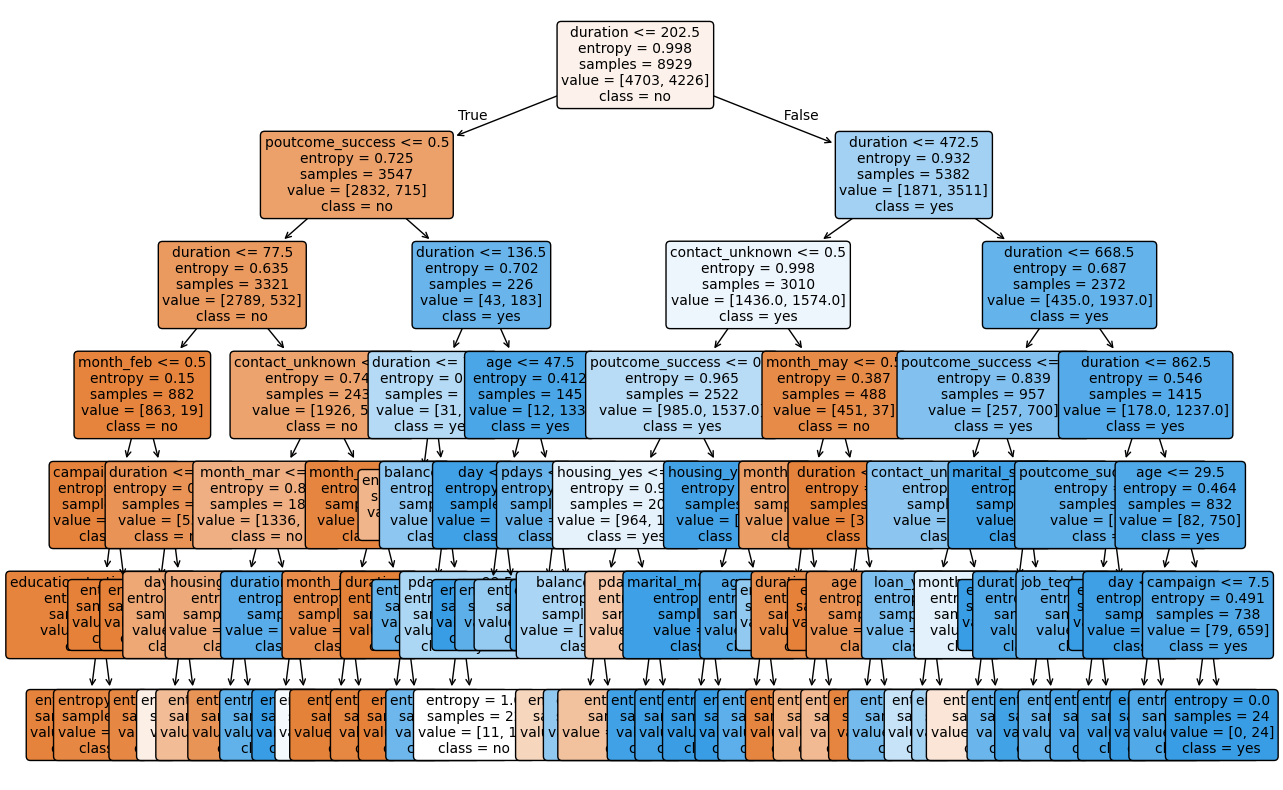

In [12]:
from sklearn.tree import plot_tree
plt.figure(figsize=(15,10))  
plot_tree(
    des,
    feature_names=X.columns,
    class_names=['no','yes'],
    filled=True,
    rounded=True,
    fontsize=10
)
plt.show()
